In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import squidpy as sq
import matplotlib.pyplot as plt
import seaborn as sns
import os

/home/mounim/miniconda3/envs/spatial_env/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/home/mounim/miniconda3/envs/spatial_env/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)


In [2]:
# Load the data
sample_id = "IMMUNEX001"
adata = sc.read(f"/scratch/IMMUNEX/segmentation/bin2cell/bin2cell_output/{sample_id}/adata_processed.h5ad")
adata.raw = adata
adata.uns['sample_id'] = sample_id

# Load the metadata
metadata = pd.read_csv("/scratch/IMMUNEX/data/VisiumHD_18_2024_NSCLC.csv")
display(metadata.head())

metadata_sample = metadata[metadata['Sample_code'] == sample_id]
adata.uns["sample_metadata"] = metadata_sample.iloc[0].to_dict()

display(adata.obs) # Display the first few rows of the observation data (cell metadata)

,Manip_Visium,DV200,HE_image_name,Cytasimage_path,TLS_status,area,slide,Average_fragment_size,Concentratio_pg_per_µL,Concentration finale (ng/µL),Final_concentration_nM,Dual _Index,Volume_available_µL,Volume_send_µL,Sample_code,Position_on_the_plaque,Sea_Dual_Index_TS_Set_A
0,NJ285,45,IMMUNEX001_Visium_HE_x40_z0.tif,assay_CAVG10047_NJ285-07-11-2024_H1-X9BBRQR_17...,High,A1,H1-X9BBRQR,252,46.6,2.33,14.0,G3,around_24,22,IMMUNEX001,A1,"SI-TS-G3,CCAGACACGG,AGAAAGCGGT,ACCGCTTTCT"
1,NJ285,47,IMMUNEX002_Visium_HE_x40_z0.tif,assay_CAVG10047_NJ285-07-11-2024_H1-X9BBRQR_17...,Low,D1,H1-X9BBRQR,252,54.7,2.73,16.4,H3,around_24,22,IMMUNEX002,B1,"SI-TS-H3,AAACAGGAGA,TCGGCCCTTG,CAAGGGCCGA"
2,NJ289,32,IMMUNEX003_Visium_HE_20_x20_z0.tif,assay_CAVG10047_NJ289-14112024_H1-ZVB979D_1731...,High,A1,H1-ZVB979D,250,80.1,4.00,24.3,A4,around_24,22,IMMUNEX003,C1,"SI-TS-A4,GCTACCCGGT,ATGTAATGGA,TCCATTACAT"
3,NJ289,43,IMMUNEX004_Visium_HE_20_x20_z0.tif,assay_CAVG10047_NJ289-14112024_H1-ZVB979D_1731...,Low,D1,H1-ZVB979D,251,62.3,3.11,18.8,B4,around_24,22,IMMUNEX004,D1,"SI-TS-B4,ACCCGCTCGA,GTCACCCGTA,TACGGGTGAC"
4,NJ291,48,IMMUNEX005_Visium_HE_20_x20_z0.tif,assay_CAVG10047_NJ291-27nov2024_H1-Z6HWYV8_173...,High,A1,H1-Z6HWYV8,260,468.6,23.40,136.7,G4,around_24,22,IMMUNEX005,E1,"SI-TS-G4,CATTTACCGT,CACCTGTAAA,TTTACAGGTG"


,in_tissue,array_row,array_col,n_counts,destripe_factor,n_counts_adjusted,labels_he,labels_he_expanded,labels_gex,labels_joint,labels_joint_source
s_002um_02587_02503-1,1,2587,2503,16.0,0.369561,12.195529,151120,151120,64638,151120,primary
s_002um_01674_00710-1,1,1674,710,5.0,0.368149,12.148933,0,116666,41349,116666,primary
s_002um_02498_02808-1,1,2498,2808,6.0,0.321744,10.617562,133961,133961,0,133961,primary
s_002um_00952_00136-1,1,952,136,9.0,0.706108,23.301573,0,0,22601,0,none
s_002um_00564_00910-1,1,564,910,1.0,0.091521,3.020180,0,0,0,0,none
...,...,...,...,...,...,...,...,...,...,...,...
s_002um_01498_01467-1,1,1498,1467,15.0,0.394737,13.026316,0,0,36925,0,none
s_002um_03318_03089-1,1,3318,3089,18.0,0.906519,29.915136,0,174092,75043,174092,primary
s_002um_00212_00415-1,1,212,415,4.0,0.248151,8.188976,0,46844,0,46844,primary
s_002um_00504_01845-1,1,504,1845,3.0,0.208666,6.885977,0,28533,9176,28533,primary


In [4]:
# Compute QC metrics to populate total_counts, n_genes_by_counts, pct_counts_mt, etc.
adata.var['mt'] = adata.var_names.str.upper().str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], inplace=True)

Subset size: (2560, 18322)


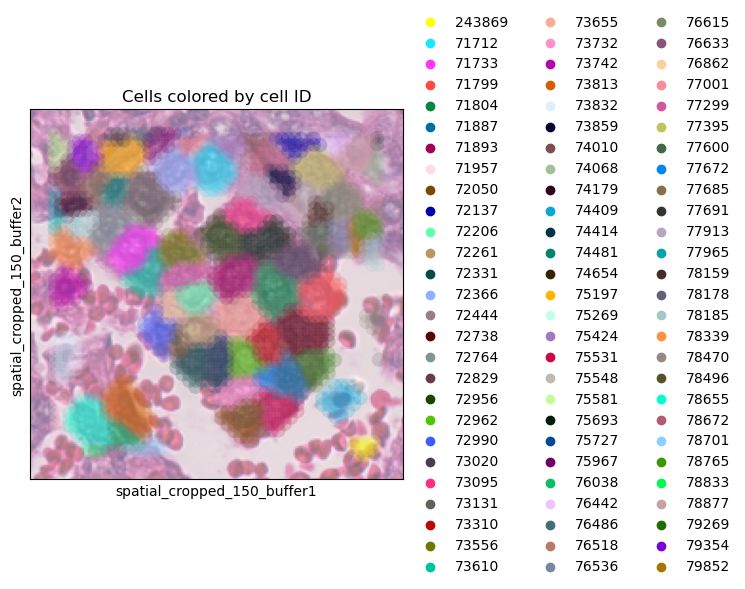

In [13]:
# Pick the spatial key (adjust if using another)
spatial_key = "spatial"
buffer = 150  # pixels

# Extract spatial coordinates
coords = adata.obsm[spatial_key]

# Pick a percent-range crop for speed
x_min, x_max = np.percentile(coords[:, 0], [80, 80.5])
y_min, y_max = np.percentile(coords[:, 1], [40.5, 41])

# Add buffer around crop
x_min -= buffer
x_max += buffer
y_min -= buffer
y_max += buffer

# Build mask and subset
mask = (
    (coords[:, 0] >= x_min) & (coords[:, 0] <= x_max) &
    (coords[:, 1] >= y_min) & (coords[:, 1] <= y_max)
)
cdata = adata[mask].copy()

print(f"Subset size: {cdata.shape}")

# Filter: only cells with valid labels
cdata_cells = cdata[cdata.obs['labels_joint'] > 0].copy()
cdata_cells.obs['cell_id'] = cdata_cells.obs['labels_joint'].astype(str)

# Ensure categorical type
cdata_cells.obs['cell_id'] = cdata_cells.obs['cell_id'].astype('category')

# Plot
sc.pl.spatial(
    cdata_cells,
    color='cell_id',
    basis='spatial_cropped_150_buffer',
    img_key='0.6_mpp_150_buffer',
    alpha_img=0.6,
    alpha=0.2,
    spot_size=20,
    title='Cells colored by cell ID',
    show=True
)


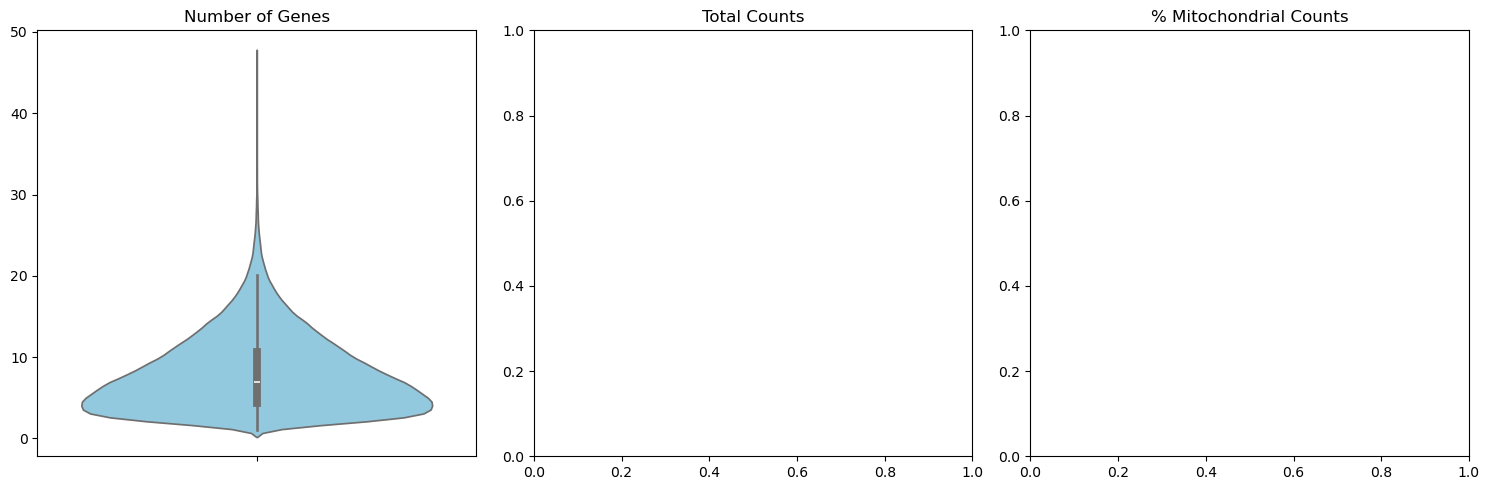

In [14]:
# Only keep entries that are assigned to cells
adata.obs['cell_id'] = adata.obs['labels_joint'].astype(str)
adata_cells = adata[adata.obs['labels_joint'] > 0].copy()

# Group bins by cell_id and aggregate counts
# For QC, we aggregate by cell_id: sum total counts, compute mean mitochondrial, etc.
# First annotate mitochondrial genes
adata_cells.var['mt'] = adata_cells.var_names.str.upper().str.startswith('MT-')

# Add total counts per gene
sc.pp.calculate_qc_metrics(adata_cells, qc_vars=['mt'], inplace=True)

# # Now aggregate per cell
qc_df = adata_cells.obs.groupby('cell_id').agg({
    'n_genes_by_counts': 'mean',
    'total_counts': 'sum',
    'pct_counts_mt': 'mean'
})


# # Create subplots: 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# # Plot each QC metric on a separate axis
sns.violinplot(y=qc_df['n_genes_by_counts'], ax=axes[0], color="skyblue")
axes[0].set_title('Number of Genes')
axes[0].set_ylabel('')

# sns.violinplot(y=qc_df['total_counts'], ax=axes[1], color="lightgreen")
axes[1].set_title('Total Counts')
axes[1].set_ylabel('')

# sns.violinplot(y=qc_df['pct_counts_mt'], ax=axes[2], color="lightcoral")
axes[2].set_title('% Mitochondrial Counts')
axes[2].set_ylabel('')

# # Add spacing
plt.tight_layout()
plt.show()


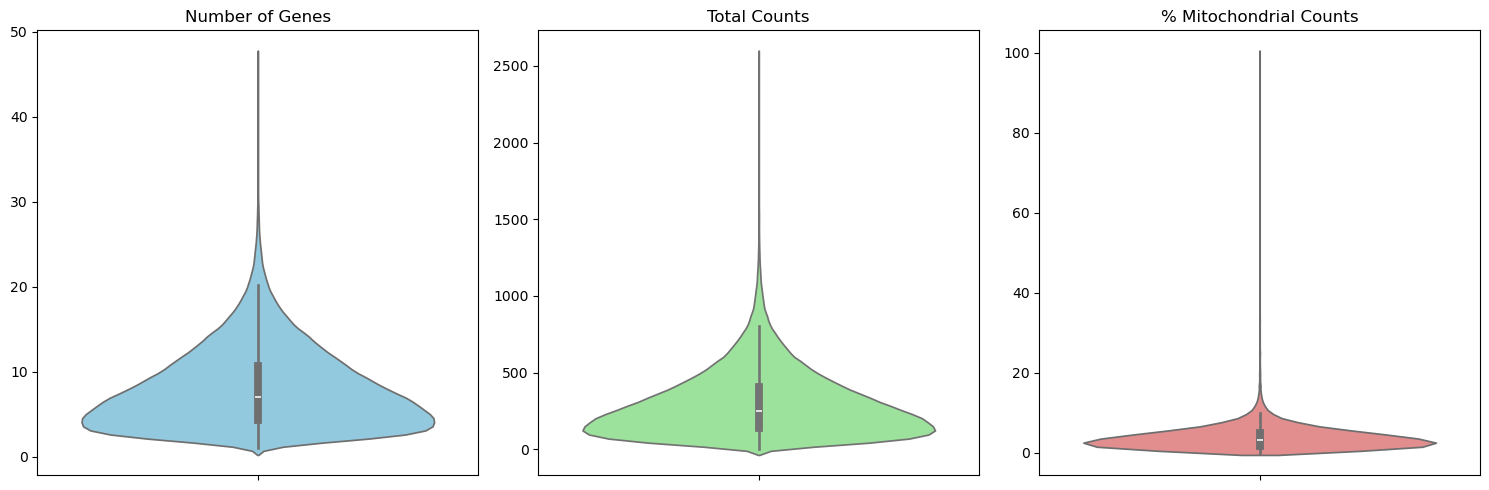

In [18]:


# # Create subplots: 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# # Plot each QC metric on a separate axis
sns.violinplot(y=qc_df['n_genes_by_counts'], ax=axes[0], color="skyblue")
axes[0].set_title('Number of Genes')
axes[0].set_ylabel('')

sns.violinplot(y=qc_df['total_counts'], ax=axes[1], color="lightgreen")
axes[1].set_title('Total Counts')
axes[1].set_ylabel('')

sns.violinplot(y=qc_df['pct_counts_mt'], ax=axes[2], color="lightcoral")
axes[2].set_title('% Mitochondrial Counts')
axes[2].set_ylabel('')

# # Add spacing
plt.tight_layout()
plt.show()

In [15]:
from tqdm import tqdm
# Use CSR for efficient row slicing
X = adata_cells.X.tocsr()
cell_ids = adata_cells.obs['cell_id'].values
print('Analysing')

# Map cell_id to integer index
unique_ids, inverse_idx = np.unique(cell_ids, return_inverse=True)
n_cells = len(unique_ids)
n_genes = X.shape[1]
print('Analysing')

# Initialize empty matrix to store the result
# Result will be dense at the end, but small: (n_cells x n_genes)
result = np.zeros((n_cells, n_genes))
print('Analysing')

# Efficient sparse row-by-row summing
for i in tqdm(range(X.shape[0])):
    result[inverse_idx[i]] += X[i].toarray()[0]

# Convert to DataFrame
grouped_expr = pd.DataFrame(result, index=unique_ids, columns=adata_cells.var_names)


Analysing
Analysing
Analysing


100%|███████████████████████████████| 5483860/5483860 [04:02<00:00, 22575.33it/s]


In [19]:
from anndata import AnnData
import scipy.sparse as sp

adata_cells = AnnData(X=sp.csr_matrix(grouped_expr.values))
adata_cells.obs_names = grouped_expr.index
adata_cells.var_names = adata_cells.var_names

# and 'cell_id' is the grouping key used to generate grouped_expr
# 1. Get a mapping from cell_id → average spatial position
cell_coords = adata.obs[['cell_id']].copy()
cell_coords['x'] = adata.obsm['spatial'][:, 0]
cell_coords['y'] = adata.obsm['spatial'][:, 1]

# 2. Average spatial position per cell
mean_coords = cell_coords.groupby('cell_id')[['x', 'y']].mean()

# 3. Match to your grouped_expr.index (cell IDs)
mean_coords = mean_coords.loc[grouped_expr.index]

# 4. Assign to obsm
adata_cells.obsm['spatial'] = mean_coords.values

# Copy the spatial dictionary to cdata
library_id = list(adata.uns['spatial'].keys())[0]
adata_cells.uns['spatial'] = {
    library_id: adata.uns['spatial'][library_id]
}

# Fix gene names
adata_cells.var_names = adata.var_names.copy()
adata_cells.var = adata.var.copy()  # optional: copy all gene metadata
adata_cells.var_names_make_unique()  # ensures no duplicate names

adata_cells

AnnData object with n_obs × n_vars = 209342 × 18322
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatial'
    obsm: 'spatial'

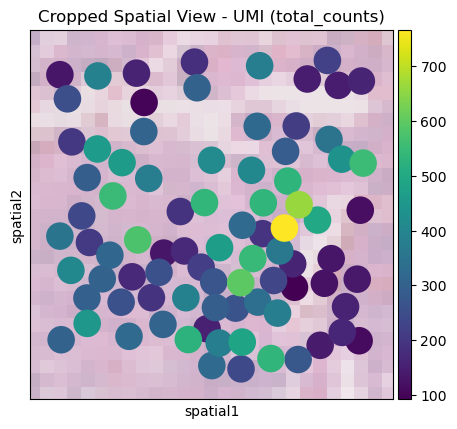

In [21]:
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt

# Step 1: Define cropping window based on spatial coordinates
coords = adata_cells.obsm["spatial"]
x_min, x_max = np.percentile(coords[:, 0], [80, 80.5])
y_min, y_max = np.percentile(coords[:, 1], [40.5, 41])

buffer = 150  # adjust for wider margin
x_min -= buffer
x_max += buffer
y_min -= buffer
y_max += buffer

# Step 2: Mask and crop
mask = (
    (coords[:, 0] >= x_min) & (coords[:, 0] <= x_max) &
    (coords[:, 1] >= y_min) & (coords[:, 1] <= y_max)
)
cdata_cells = adata_cells[mask].copy()

# Step 3: Plot total UMI counts (total_counts)
if 'total_counts' not in cdata_cells.obs.columns:
    cdata_cells.obs['total_counts'] = np.array(cdata_cells.X.sum(axis=1)).flatten()

sc.pl.spatial(
    cdata_cells,
    color="total_counts",
    img_key="hires",
    alpha_img=0.4,
    spot_size=40,
    cmap="viridis",
    title="Cropped Spatial View - UMI (total_counts)",
    show=True
)


In [38]:
cdata_cells.obs['id'] = cdata_cells.obs.index.astype('category')
cdata_cells.obs

,total_counts,140379844830512,id
243717,305.149307,243717,243717
243842,122.430754,243842,243842
243846,115.620979,243846,243846
243861,98.384503,243861,243861
243862,130.753741,243862,243862
...,...,...,...
79946,144.940410,79946,79946
80084,231.147540,80084,80084
80130,129.565065,80130,80130
80171,287.038429,80171,80171


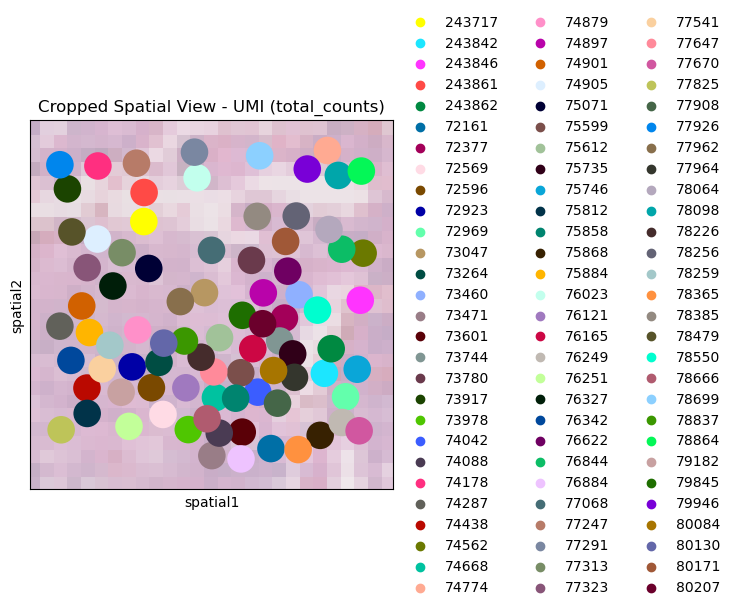

In [39]:

sc.pl.spatial(
    cdata_cells,
    color="id",
    img_key="hires",
    alpha_img=0.4,
    spot_size=40,
    cmap="viridis",
    title="Cropped Spatial View - UMI (total_counts)",
    show=True
)

Before filtering: 209342 cells
After filtering: 205149 cells


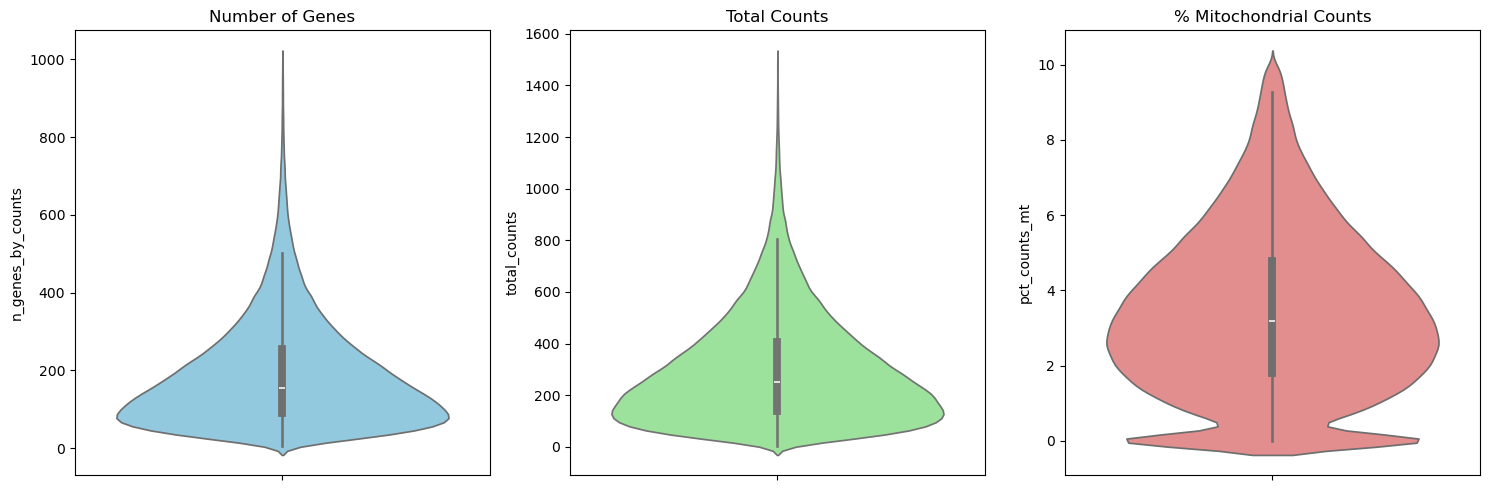

In [40]:
# Annotate mitochondrial genes if not already done
adata_cells.var['mt'] = adata_cells.var_names.str.upper().str.startswith('MT-')

# Calculate QC metrics
import scanpy as sc
sc.pp.calculate_qc_metrics(adata_cells, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

# Thresholds based on your QC plot
min_genes = 5        # most cells have >5 genes
max_genes = 1000       # upper whisker
min_counts = 5      # remove empty droplets
max_counts = 1500    # safely below extreme outliers
max_mt = 10          # remove cells with >10% mitochondrial content

# Apply filters
cell_filtered = adata_cells[
    (adata_cells.obs['n_genes_by_counts'] > min_genes) &
    (adata_cells.obs['n_genes_by_counts'] < max_genes) &
    (adata_cells.obs['total_counts'] > min_counts) &
    (adata_cells.obs['total_counts'] < max_counts) &
    (adata_cells.obs['pct_counts_mt'] < max_mt)
].copy()

print(f"Before filtering: {adata_cells.n_obs} cells")
print(f"After filtering: {cell_filtered.n_obs} cells")

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.violinplot(y=cell_filtered.obs['n_genes_by_counts'], ax=axs[0], color="skyblue")
axs[0].set_title("Number of Genes")

sns.violinplot(y=cell_filtered.obs['total_counts'], ax=axs[1], color="lightgreen")
axs[1].set_title("Total Counts")

sns.violinplot(y=cell_filtered.obs['pct_counts_mt'], ax=axs[2], color="lightcoral")
axs[2].set_title("% Mitochondrial Counts")
# NOTE: MT genes are transcribed only from mitochondria, not the nucleus.

plt.tight_layout()
plt.show()

In [41]:
# Average UMI per spot
avg_umi_spot = adata.obs['total_counts'].median()
print(f"Average UMI per spot: {avg_umi_spot:.2f}")

# Average UMI per cell
avg_umi_cell = adata_cells.obs['total_counts'].median()
print(f"Average UMI per cell: {avg_umi_cell:.2f}")

# Average UMI per cell
avg_umi_cell = cell_filtered.obs['total_counts'].median()
print(f"Average UMI per cell_filtered : {avg_umi_cell:.2f}")


Average UMI per spot: 7.86
Average UMI per cell: 247.64
Average UMI per cell_filtered : 249.64


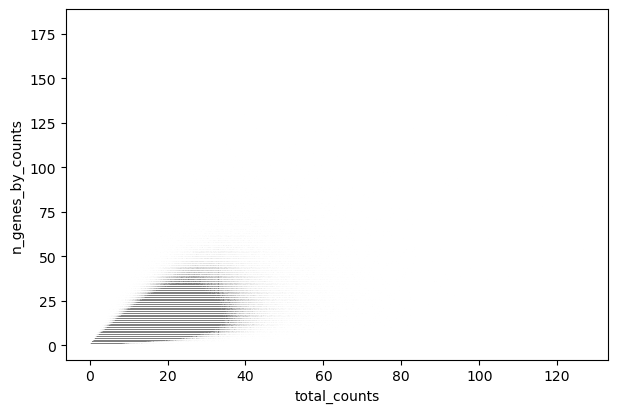

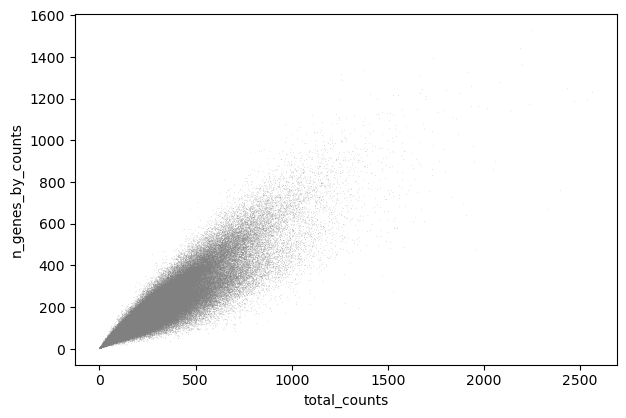

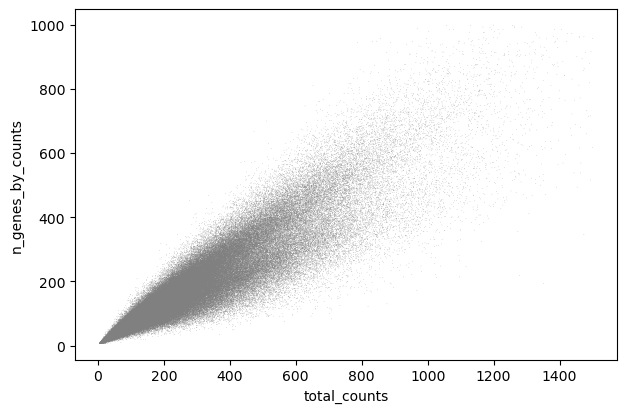

In [42]:
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts',show = True)
sc.pl.scatter(adata_cells, x='total_counts', y='n_genes_by_counts',show = True)
sc.pl.scatter(cell_filtered, x='total_counts', y='n_genes_by_counts',show = True)


In [43]:
# Save the filtered AnnData object to an intermediate file
output_path = f"../data//intermediate/{sample_id}/"
os.makedirs(output_path, exist_ok=True)
cell_filtered.write(output_path + '/cell_filtered.h5ad')

print(f"Filtered AnnData object saved to: {output_path}")


Filtered AnnData object saved to: ../data//intermediate/IMMUNEX001/
